![](http://all-geo.org/volcan01010/wp-content/uploads/2011/02/volcan01010_header.png)


I am a geologist doing postdoctoral research at Edinburgh University.  I [blog](http://all-geo.org/volcan01010) and [tweet](https://twitter.com/volcan01010) about volcanoes, Iceland, GIS/maps & open source science software.  I've recently been working on grainsize data that are lognormally distributed.  I got really confused trying to do calculations in Python because there are a number of different ways of defining lognormal distributions, and because the way that you use them in Python isn't what you would immediately expect.  Now that I have figured it out, I have prepared this notebook to remind myself and to help others.

Note that you can download the notebook from the link at the top of this page and play with it yourself.

### Different forms of the lognormal distribution

The lognormal probability distribution of a dataset, $X$, is commonly defined as:

$$ f(x~|~\mu, \sigma) = \dfrac{1}{x\sigma\sqrt{2\pi}} e ^{ \dfrac{-(lnx - \mu)^2}{2\sigma^2} } $$

In this formulation, $\mu$ and $\sigma$ are the mean and standard deviation of $ln(X).$



In Python, the _scipy.stats.lognorm_ module uses a more general, 3-parameter formulation:

$$ f(x~|~\textbf{[shape]}, \textbf{[location]}, \textbf{[scale]}) = \dfrac{1}{(x-\textbf{[location]})\textbf{[shape]}\sqrt{2\pi}} e ^{ \dfrac{-(ln(x-\textbf{[location]})-ln(\textbf{[scale]}))^2}{2\textbf{[shape]}^2}} $$

For most uses (i.e. unless data contain negative values), the **location** parameter is fixed at 0.  This can be done during curve fitting using _floc=0_.  The expression then simplifies to:

$$ f(x~|~\textbf{[shape]}, \textbf{[scale]}) = \dfrac{1}{x\textbf{[shape]}\sqrt{2\pi}} e ^{ \dfrac{-(lnx - ln\textbf{[scale]})^2 }{2\textbf{[shape]}^2}} $$

Comparing the two forms shows that:

$ ln(\textbf{[scale]}) =  \mu $

therefore: $ \textbf{[scale]} = e^{\mu} $

and: $ \textbf{[shape]} = \sigma $

Confusingly, these are different from the parameters controlling a normal distribution in the _scipy.stats.norm_ module, where **location** corresponds to the mean and **scale** is the standard deviation.  They are also different to the definitions of **location** and **scale** for lognormal distributions in Wikipedia.

In atmospheric sciences, an equation of the following form is commonly used for grainsize distributions:

$$ n(r~|M, s) = \dfrac{N_0}{rln(s)\sqrt{2\pi}} e ^{ \dfrac{-ln^2\left(\tfrac{r}{M}\right) }{2ln^2(s)}} = \dfrac{N_0}{rln(s)\sqrt{2\pi}} e ^{\dfrac{-(ln(r) - ln(M))^2}{2ln^2(s)}} $$

In this form, $M$ is the median radius ($r_m$, also equal to the _geometric_ mean radius) and $s$ is the _geometric_ standard deviation.  The advantage of this form is that the parameters have not been 'logged' so it is easier to relate them to the real world and to calculate confidence intervals (see below).  Confusingly, $s$ is represented in some studies by the symbol $\sigma$.

### Lognormal distributions in Python

The cell below demonstrates lognormal distributions in Python.  The parameters can be converted between all the different forms.  The plots show that the probability density function appears 'normal' on a logarithmic axis and that the mean, mode and median are **all different**.  Lognormal distributions are skewed with a large variance, and normally only contain positive values.  Fitting lognormally distributed data with a normal distribution will underestimate the proportion of large values.  Earth scientists work with sieve data using the $\phi$ scale, which is a logarithmic scale with base 2, as grainsize distributions of sediments are typically lognormal.

Experiment with different $M$ and $s$ and see how the other parameters change.

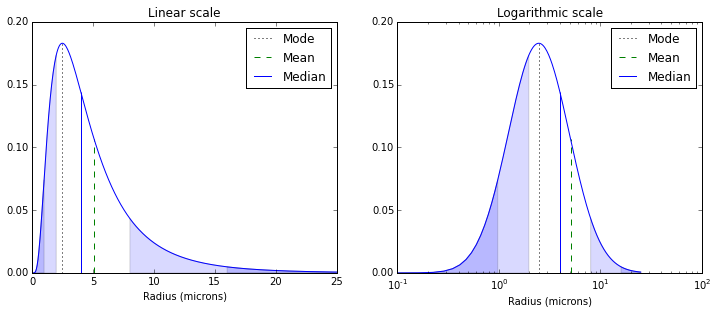

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats # Import the scipy.stats module

# Definitions of different parameters. (float() used to avoid problems with Python integer division)
M = float(4) # Geometric mean == median
s = float(2) # Geometric standard deviation
mu = np.log(M) # Mean of log(X)
sigma = np.log(s) # Standard deviation of log(X)
shape = sigma # Scipy's shape parameter
scale = np.exp(mu) # Scipy's scale parameter
median = np.exp(mu)
mode = np.exp(mu - sigma**2) # Note that mode depends on both M and s
mean = np.exp(mu + (sigma**2/2)) # Note that mean depends on both M and s
x = np.linspace(0.1, 25, num=400) # values for x-axis
pdf = stats.lognorm.pdf(x, shape, loc=0, scale=scale) # probability distribution

plt.figure(figsize=(12,4.5))
# Figure on linear scale
plt.subplot(121)
plt.plot(x, pdf)
plt.fill_between(x, pdf, where=(x < M/s), alpha=0.15)
plt.fill_between(x, pdf, where=(x > M*s), alpha=0.15)
plt.fill_between(x, pdf, where=(x < M/s**2), alpha=0.15)
plt.fill_between(x, pdf, where=(x > M*s**2), alpha=0.15)
plt.vlines(mode, 0, pdf.max(), linestyle=':', label='Mode')
plt.vlines(mean, 0, stats.lognorm.pdf(mean, shape, loc=0, scale=scale), linestyle='--', color='green', label='Mean')
plt.vlines(median, 0, stats.lognorm.pdf(median, shape, loc=0, scale=scale), color='blue', label='Median')
plt.ylim(ymin=0)
plt.xlabel('Radius (microns)')
plt.title('Linear scale')
leg=plt.legend()

# Figure on logarithmic scale
plt.subplot(122)
plt.semilogx(x, pdf)
plt.fill_between(x, pdf, where=(x < M/s), alpha=0.15)
plt.fill_between(x, pdf, where=(x > M*s), alpha=0.15)
plt.fill_between(x, pdf, where=(x < M/s**2), alpha=0.15)
plt.fill_between(x, pdf, where=(x > M*s**2), alpha=0.15)
plt.vlines(mode, 0, pdf.max(), linestyle=':', label='Mode')
plt.vlines(mean, 0, stats.lognorm.pdf(mean, shape, loc=0, scale=scale), linestyle='--', color='green', label='Mean')
plt.vlines(median, 0, stats.lognorm.pdf(median, shape, loc=0, scale=scale), color='blue', label='Median')
plt.ylim(ymin=0)
plt.xlabel('Radius (microns)')
plt.title('Logarithmic scale')
leg=plt.legend()

### Fitting a lognormal distribution

In [13]:
rvs = stats.lognorm.rvs(np.log(25), loc=0, scale=-350, size=313) # Generate some random variates as data
n, bins, patches = plt.hist(rvs, bins=100, normed=True) # Plot histogram

ValueError: Domain error in arguments.

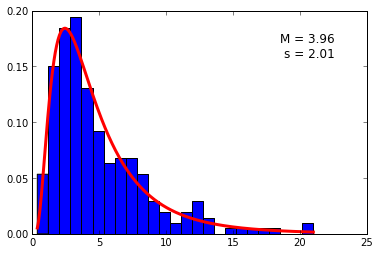

In [173]:
rvs = stats.lognorm.rvs(np.log(2), loc=0, scale=4, size=250) # Generate some random variates as data
n, bins, patches = plt.hist(rvs, bins=25, normed=True) # Plot histogram

shape, loc, scale = stats.lognorm.fit(rvs, floc=0) # Fit a curve to the variates
mu = np.log(scale) # Mean of log(X)
sigma = shape # Standard deviation of log(X)
M = np.exp(mu) # Geometric mean == median
s = np.exp(sigma) # Geometric standard deviation

# Plot figure of results
x = np.linspace(rvs.min(), rvs.max(), num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'r', linewidth=3) # Plot fitted curve
ax = plt.gca() # Get axis handle for text positioning
txt = plt.text(0.9, 0.9, 'M = %.2f\ns = %.2f' % (M, s), horizontalalignment='right', 
                size='large', verticalalignment='top', transform=ax.transAxes)

### Confidence intervals

Confidence intervals in a lognormal distribution can be calculated using the geometric mean, $M$, and geometric standard deviation, $s$ in a similar way to a normal distribution, but with multiplication and division instead of addition and subtraction.  This is demonstrated in the shaded regions in the figures above, and in the code below.

In [184]:
# Definitions of different parameters
M = float(4) # Geometric mean == median
s = float(2) # Geometric standard deviation
mu = np.log(M) # Mean of log(X)
sigma = np.log(s) # Standard deviation of log(X)
shape = sigma # Scipy's shape parameter
scale = np.exp(mu) # Scipy's scale parameter

print "From geometric mean and standard deviation"
print "68.3%% of distribution between %.2f and %.2f" % (M/s, M*s) # multiply and divide, not +/-
print "95.5%% of distribution between %.2f and %.2f" % (M/s**2, M*s**2) # note s squared 
print "99.7%% of distribution between %.2f and %.2f" % (M/s**3, M*s**3) # note s cubed

# scipy.stats.lognorm also has a builtin function for calculating intervals
print
print "From stats.lognorm.interval"
print "68.3%: ", stats.lognorm.interval(0.683, shape, loc=0, scale=scale)
print "95.5%: ", stats.lognorm.interval(0.955, shape, loc=0, scale=scale)
print "99.7%: ", stats.lognorm.interval(0.997, shape, loc=0, scale=scale)

From geometric mean and standard deviation
68.3% of distribution between 2.00 and 8.00
95.5% of distribution between 1.00 and 16.00
99.7% of distribution between 0.50 and 32.00

From stats.lognorm.interval
68.3%:  (1.9991104342962782, 8.0035598461734203)
95.5%:  (0.99677897162877904, 16.051702990739596)
99.7%:  (0.51130713903753477, 31.292346181822669)


### References

+ [Wikipedia page on the Lognormal distribution](http://en.wikipedia.org/wiki/Log-normal_distribution)
+ [Log-Normal distributions across the sciences: Keys and clues](http://stat.ethz.ch/~stahel/lognormal/bioscience.pdf‎)
+ [*scipy.stats.lognormal* manual page](http://docs.scipy.org/doc/scipy-0.12.0/reference/generated/scipy.stats.lognorm.html)
+ [iPython notebooks](http://ipython.org/notebook.html)
+ [**volcan01010** blog about volcanoes, Iceland, GIS/maps and open source science software](http://all-geo.org/volcan01010/2013/09/how-to-use-lognormal-distributions-in-python)
+ [@volcan01010 on Twitter](https://twitter.com/volcan01010)